In [26]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [27]:
# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [28]:
# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

In [29]:
# 'SciPy' is used to perform scientific computations
from scipy.stats import jarque_bera
from scipy import stats
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

In [30]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# return an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format

In [31]:
df=pd.read_csv("admission_data.csv")
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.500000,4.500000,9.650000,1,0.920000
1,324,107,4,4.000000,4.500000,8.870000,1,0.760000
2,316,104,3,3.000000,3.500000,8.000000,1,0.720000
3,322,110,3,3.500000,2.500000,8.670000,1,0.800000
4,314,103,2,2.000000,3.000000,8.210000,0,0.650000


DATA PREPARATION AND ANALYSIS

In [32]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [33]:
df.shape

(500, 8)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [35]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.484000,8.576440,0.560000,0.721740
std,11.295148,6.081868,1.143512,0.991004,0.925450,0.604813,0.496884,0.141140
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.127500,0.000000,0.630000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.720000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


DISCOVER OUTLINER

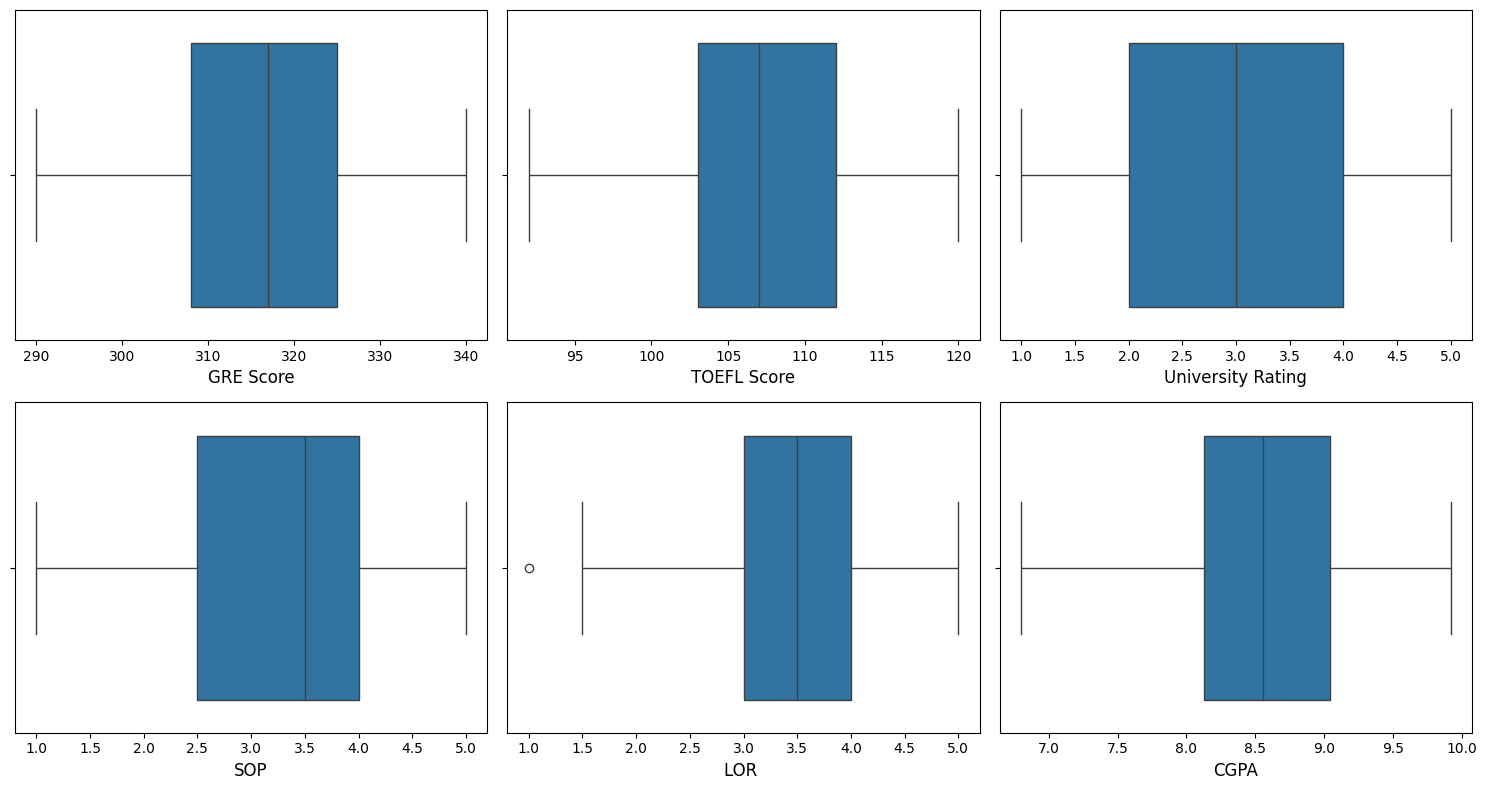

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


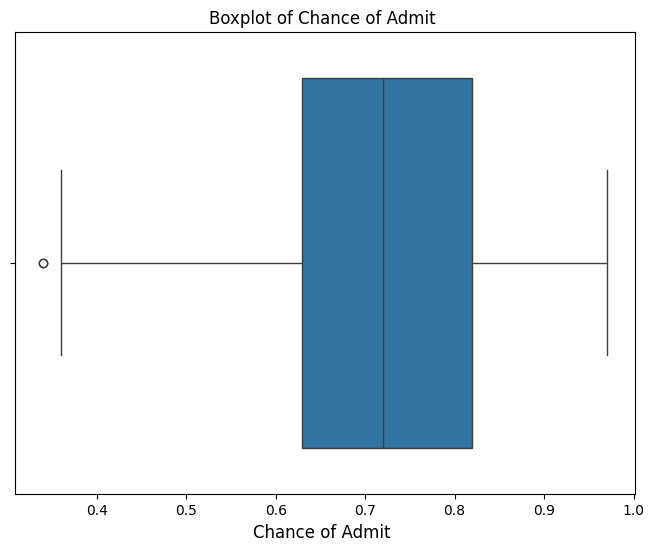

In [36]:
# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# Select numeric features
df_numeric_features = df.select_dtypes(np.number)

# Create boxplots for each numeric feature
for variable, subplot in zip(df_numeric_features.columns, ax.flatten()):
    sns.boxplot(x=df_numeric_features[variable], orient="h", whis=1.5, ax=subplot)
    subplot.set_xlabel(variable, fontsize=12)  # Reduced font size for better fit

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()
 
# If you want a separate boxplot for 'Chance of Admit' only:
# Check the exact column names
print(df_numeric_features.columns)

# Replace 'Chance of Admit' with the correct column name as printed above
# For example, if the column is 'Chance of Admit ' (with a space at the end), use that name:
# sns.boxplot(x=df_numeric_features['Chance of Admit '], orient="h", whis=1.5)

# If you want to automatically find the closest match:
from difflib import get_close_matches
col_name = get_close_matches('Chance of Admit', df_numeric_features.columns, n=1)
if col_name:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_numeric_features[col_name[0]], orient="h", whis=1.5)
    plt.xlabel(col_name[0], fontsize=12)
    plt.title(f'Boxplot of {col_name[0]}')
    plt.show()
else:
    print("Column 'Chance of Admit' not found in dataframe columns.")

In [37]:
df_numeric_features.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.500000,4.500000,9.650000,1,0.920000
1,324,107,4,4.000000,4.500000,8.870000,1,0.760000
2,316,104,3,3.000000,3.500000,8.000000,1,0.720000
3,322,110,3,3.500000,2.500000,8.670000,1,0.800000
4,314,103,2,2.000000,3.000000,8.210000,0,0.650000


Removing Outliner with IQR

In [38]:

Q1 = df_numeric_features.quantile(0.25)
Q3 = df_numeric_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

GRE Score           17.000000
TOEFL Score          9.000000
University Rating    2.000000
SOP                  1.500000
LOR                  1.000000
CGPA                 0.912500
Research             1.000000
Chance of Admit      0.190000
dtype: float64


In [39]:
# filter out the outlier values
# ~ : selects all rows which do not satisfy the condition
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [40]:
df.shape

(497, 8)

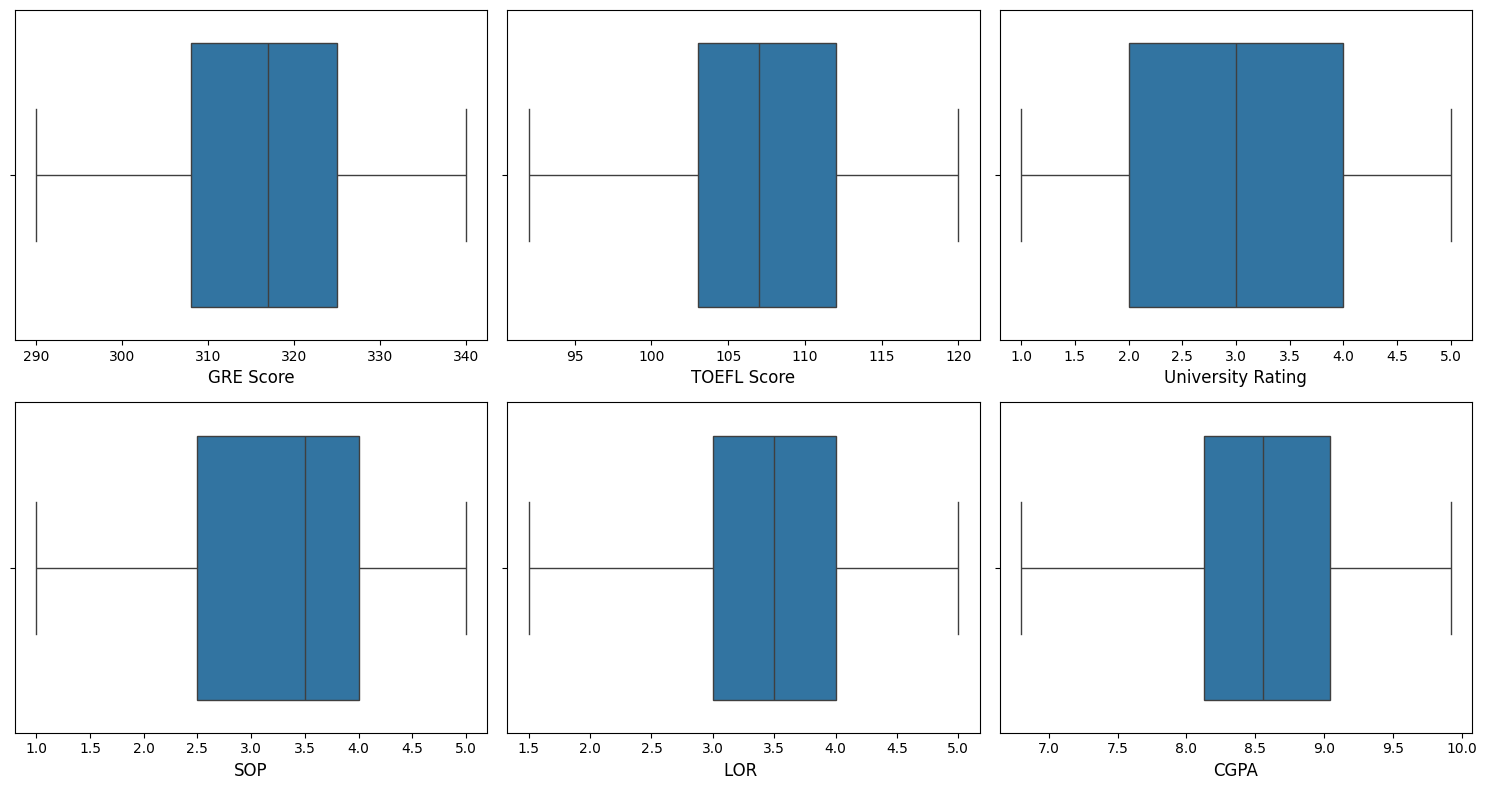

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')
Found column: Chance of Admit 
Q1: 0.640
Q3: 0.820
IQR: 0.180
Lower bound: 0.370
Upper bound: 1.090

Number of outliers: 3
Outlier values: [0.36 0.36 0.37]


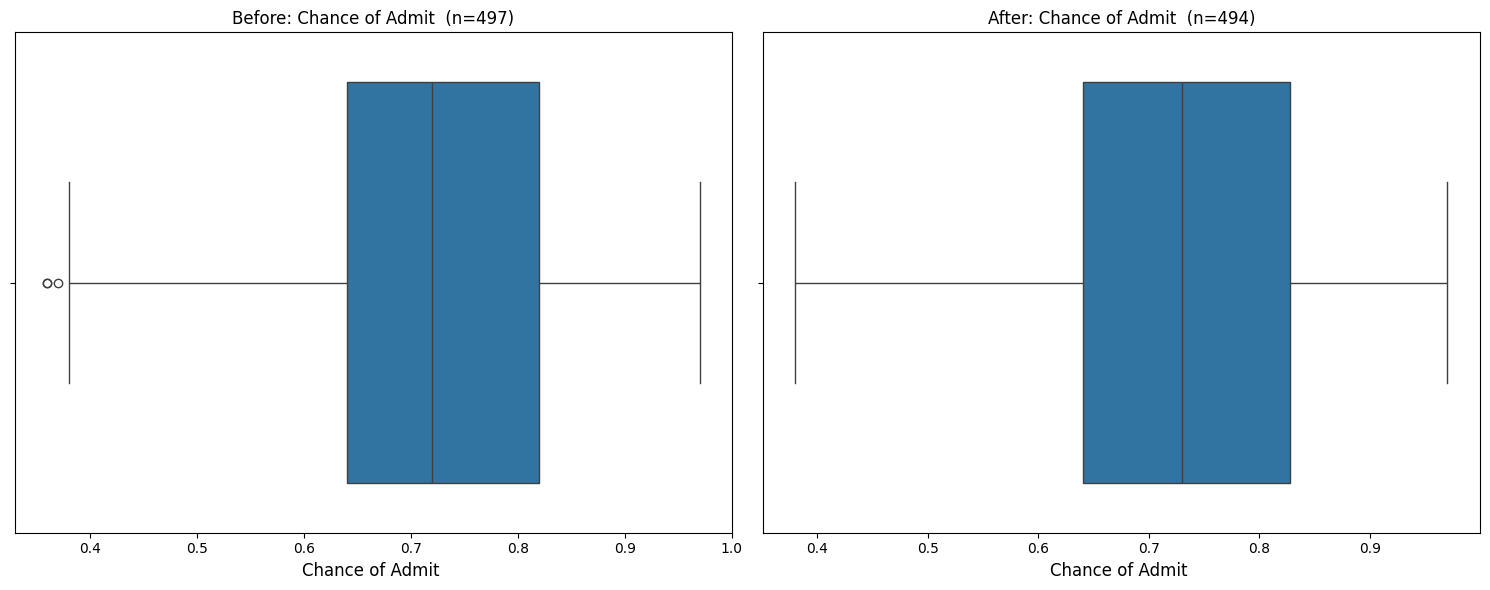


Original dataset size: 497
Cleaned dataset size: 494
Removed 3 outliers

Dataset updated. New shape: (494, 8)

Summary statistics for Chance of Admit :
count   494.000000
mean      0.726073
std       0.136333
min       0.380000
25%       0.640000
50%       0.730000
75%       0.827500
max       0.970000
Name: Chance of Admit , dtype: float64


In [41]:
# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

df_numeric_features = df.select_dtypes(np.number)


for variable, subplot in zip(df_numeric_features.columns, ax.flatten()):
    sns.boxplot(x=df_numeric_features[variable], orient="h", whis=1.5, ax=subplot)
    subplot.set_xlabel(variable, fontsize=12)  # Reduced font size for better fit


plt.tight_layout()
plt.show()
 

print(df_numeric_features.columns)

# First, let's identify the correct column name for "Chance of Admit"
df_numeric_features = df.select_dtypes(np.number)
col_name = get_close_matches('Chance of Admit', df_numeric_features.columns, n=1)

if col_name:
    chance_col = col_name[0]
    print(f"Found column: {chance_col}")
    
    # Calculate Q1, Q3, and IQR
    Q1 = df[chance_col].quantile(0.25)
    Q3 = df[chance_col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"Q1: {Q1:.3f}")
    print(f"Q3: {Q3:.3f}")
    print(f"IQR: {IQR:.3f}")
    print(f"Lower bound: {lower_bound:.3f}")
    print(f"Upper bound: {upper_bound:.3f}")
    
    # Identify outliers
    outliers = df[(df[chance_col] < lower_bound) | (df[chance_col] > upper_bound)]
    print(f"\nNumber of outliers: {len(outliers)}")
    print(f"Outlier values: {outliers[chance_col].values}")
    
    # Show before and after comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Before removing outliers
    sns.boxplot(x=df[chance_col], orient="h", whis=1.5, ax=ax1)
    ax1.set_xlabel(chance_col, fontsize=12)
    ax1.set_title(f'Before: {chance_col} (n={len(df)})')
    
    # Remove outliers
    df_clean = df[(df[chance_col] >= lower_bound) & (df[chance_col] <= upper_bound)]
    
    # After removing outliers
    sns.boxplot(x=df_clean[chance_col], orient="h", whis=1.5, ax=ax2)
    ax2.set_xlabel(chance_col, fontsize=12)
    ax2.set_title(f'After: {chance_col} (n={len(df_clean)})')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nOriginal dataset size: {len(df)}")
    print(f"Cleaned dataset size: {len(df_clean)}")
    print(f"Removed {len(df) - len(df_clean)} outliers")
    
    # Update the main dataframe
    df = df_clean.copy()
    print(f"\nDataset updated. New shape: {df.shape}")
    
    # Show summary statistics
    print(f"\nSummary statistics for {chance_col}:")
    print(df[chance_col].describe())
    
else:
    print("Column 'Chance of Admit' not found in dataframe columns.")
    print("Available columns:", df_numeric_features.columns.tolist())

In [42]:
corr =  df_clean.corr()

# print the correlation matrix
corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.822375,0.627507,0.611323,0.510700,0.822322,0.560426,0.805995
TOEFL Score,0.822375,1.000000,0.642899,0.641270,0.527290,0.806164,0.461402,0.787237
University Rating,0.627507,0.642899,1.000000,0.728644,0.598658,0.698940,0.425507,0.687541
SOP,0.611323,0.641270,0.728644,1.000000,0.657765,0.712793,0.403782,0.691077
LOR,0.510700,0.527290,0.598658,0.657765,1.000000,0.624904,0.366546,0.634047
CGPA,0.822322,0.806164,0.698940,0.712793,0.624904,1.000000,0.503232,0.881087
Research,0.560426,0.461402,0.425507,0.403782,0.366546,0.503232,1.000000,0.547289
Chance of Admit,0.805995,0.787237,0.687541,0.691077,0.634047,0.881087,0.547289,1.000000


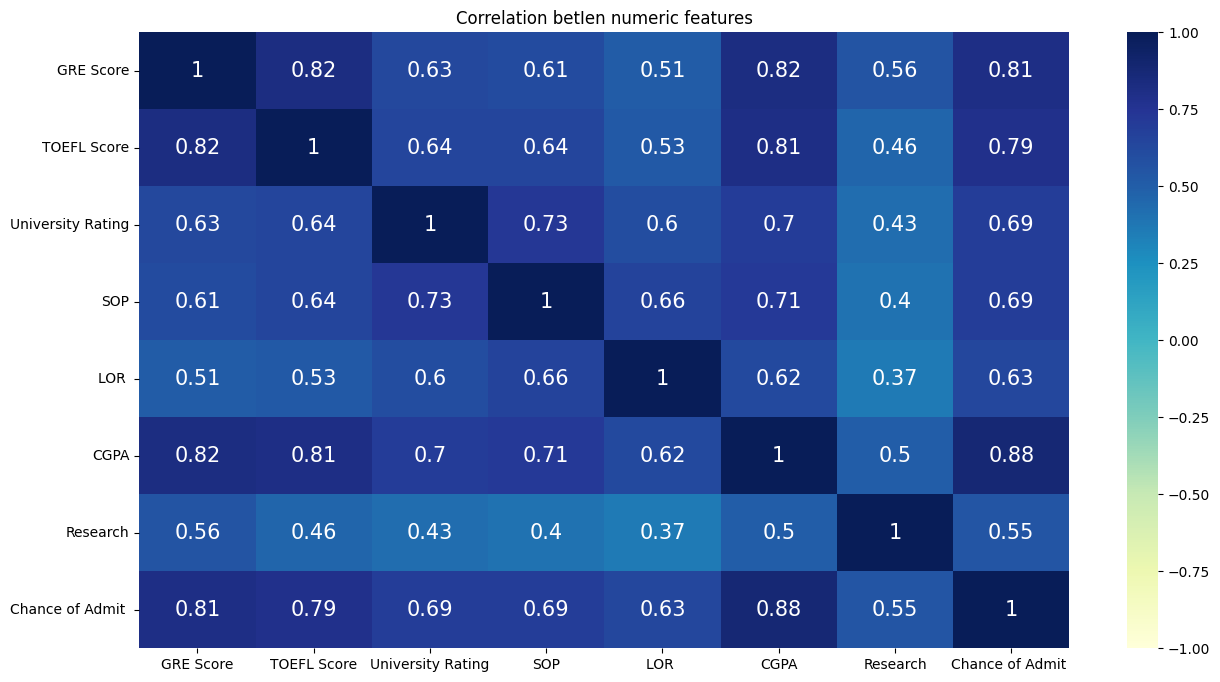

In [43]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr, cmap='YlGnBu' ,vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15})
plt.title('Correlation betIen numeric features')
plt.show()

Analyze the relationship betIen University Rating and CGPA

<Axes: xlabel='University Rating', ylabel='CGPA'>

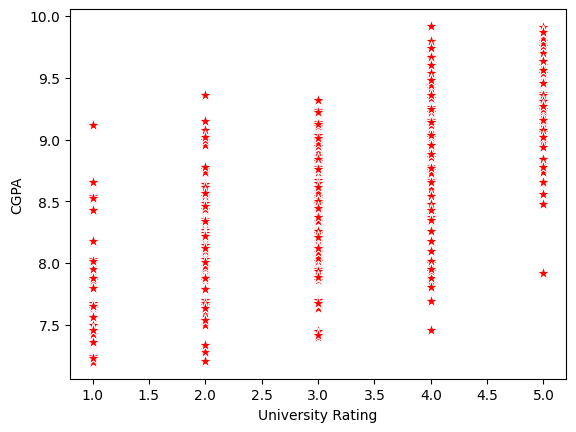

In [50]:
sns.scatterplot(x='University Rating',y='CGPA',data=df_clean,color='Red', marker="*", s=100)

In [45]:
df_adm_dummy = pd.concat([df_numeric_features], axis=1)


df_adm_dummy.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.500000,4.500000,9.650000,1,0.920000
1,324,107,4,4.000000,4.500000,8.870000,1,0.760000
2,316,104,3,3.000000,3.500000,8.000000,1,0.720000
3,322,110,3,3.500000,2.500000,8.670000,1,0.800000
4,314,103,2,2.000000,3.000000,8.210000,0,0.650000


Linear Regression (OLS)

Multiple Linear Regression - Full Model (OLS)

Split the data into training and test sets

In [46]:
from difflib import get_close_matches

# Find the correct column name for 'Chance of Admit'
target_col = get_close_matches('Chance of Admit', df_adm_dummy.columns, n=1)[0]

X = df_adm_dummy.drop([target_col], axis=1)
# extract the target variable from the data set
y = df_adm_dummy[target_col]
# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (372, 7)
The shape of X_test is: (125, 7)
The shape of y_train is: (372,)
The shape of y_test is: (125,)


Build model using sm.OLS().fit()

In [47]:
linreg_full_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(linreg_full_model.summary())

                                 OLS Regression Results                                
Dep. Variable:       Chance of Admit    R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              6415.
Date:                Thu, 26 Jun 2025   Prob (F-statistic):                        0.00
Time:                        19:26:02   Log-Likelihood:                          483.03
No. Observations:                 372   AIC:                                     -952.1
Df Residuals:                     365   BIC:                                     -924.6
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

Durbin-Watson : The Durbin-Watson statistic will always have a value betIen 0 and 4. A value of 2.0 means that there is no autocorrelation detected in the sample. Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative autocorrelation

Dealing with the multicollinearity



Using Variance inflation Factor


The Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity betIen the features. The value of VIF equal to 1 indicates that no features are correlated. I calculate VIF of the numerical independent variables.

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

# Use the correct column name from target_col
df_numeric_features.drop([target_col], axis=1, inplace=True)

vif['VIF_Factor'] = [variance_inflation_factor(df_numeric_features.values, i) for i in range(df_numeric_features.shape[1])]
vif['Features'] = df_numeric_features.columns
vif


,VIF_Factor,Features
0,1311.336379,GRE Score
1,1215.711563,TOEFL Score
2,20.996452,University Rating
3,35.560845,SOP
4,31.037767,LOR
5,947.759449,CGPA
6,2.878970,Research
